<a href="https://colab.research.google.com/github/HiyaJain22/compute-task/blob/main/Sine_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.arange(np.pi/30,(10*np.pi)/6,0.1)  
y = np.sin(X)

In [ ]:
df=pd.DataFrame(data=[X,y]).T 
df.columns=['X','Y']
print(df.head())

         X         Y
0  0.10472  0.104528
1  0.20472  0.203293
2  0.30472  0.300026
3  0.40472  0.393761
4  0.50472  0.483562


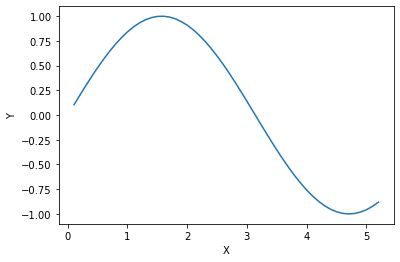

In [ ]:
plt.plot(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2

  return 1/ (2*m) * np.sum(error)


In [ ]:
m = df.X.size
X = np.append(np.ones((m, 1)), df.X.values.reshape(m, 1), axis=1)
y = df.Y.values.reshape (m, 1)
theta = np.zeros((2,1))

In [ ]:
cost_function (X, y, theta)

0.2739188476633819

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs =[]
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m *error
    costs.append(cost_function(X, y, theta))
  return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha =0.01, iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))     

h(x) = 1.18 + -0.41x1


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(X,y,t)

<ipython-input-22-fd5f169013c6>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ='3d')


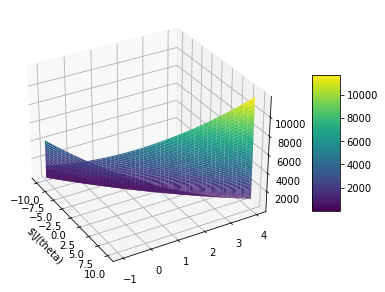

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.gca(projection ='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap ='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\J(theta)")
plt.ylabel("")
ax.set_zlabel("")

ax.view_init(30, 330)

plt.show()

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

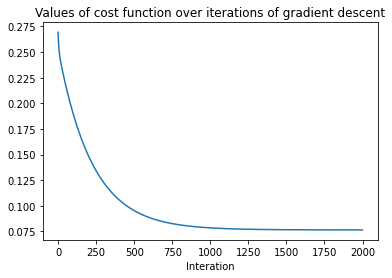

In [ ]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("")
plt.title("Values of cost function over iterations of gradient descent")

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[ 1.17839013],
       [-0.41008695]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


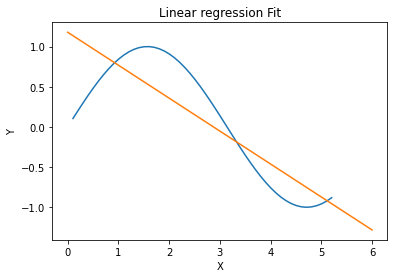

In [ ]:
theta = np.squeeze(theta)

sns.lineplot(x="X",y="Y",data=df)

x_value = [x for x in range(0,7)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value,y_value)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear regression Fit");

In [ ]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [ ]:
y_pred_1 = predict(np.array([1,0.10472]), theta)
y_pred_1

1.1354458196209953